# Ejercicios de Seaborn

In [1]:
# 1. Importa pandas, pyplot y seaborn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame

In [4]:
df = pd.read_csv('./data/Pokemon.csv', index_col='#')

In [5]:
# 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [6]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [7]:
# 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal
# Pasa el DataFrame como argumento del función en el parámetro llamado data

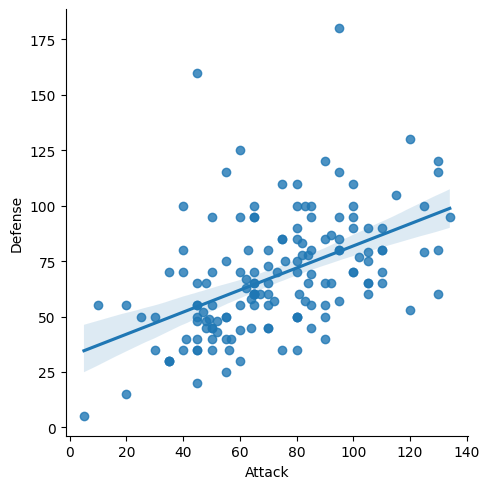

In [8]:
sns.lmplot(x='Attack', y='Defense', data = df);

In [9]:
# 6. No queremos ver la línea recta de la regresión lineal.
# prueba a añadir fit_reg a falso

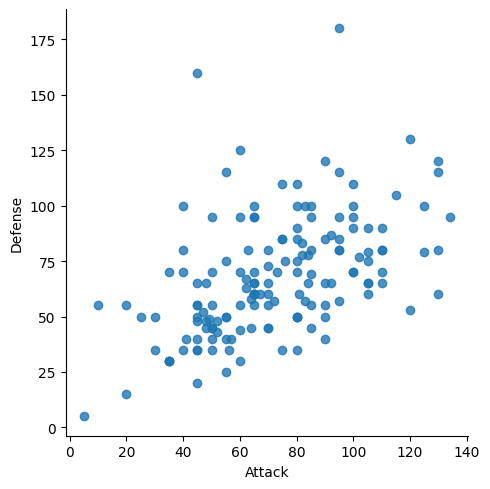

In [10]:
sns.lmplot(x='Attack', y='Defense', data = df, fit_reg=False);

In [11]:
# 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
# Que el hue sea el Stage

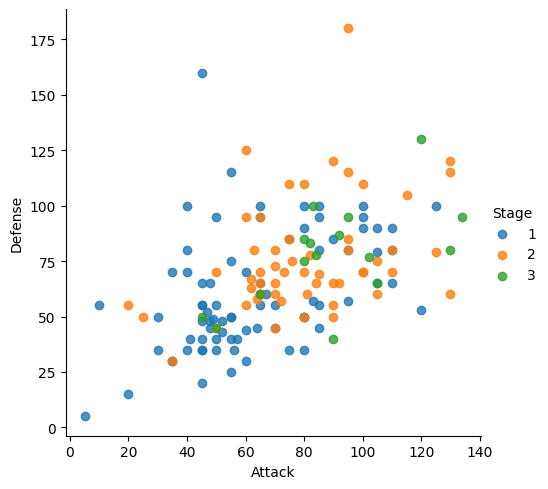

In [12]:
sns.lmplot(x='Attack', y='Defense', data = df, fit_reg=False, hue='Stage');

In [13]:
# 8. Limita el eje x entre 20 y 100

<Figure size 1000x600 with 0 Axes>

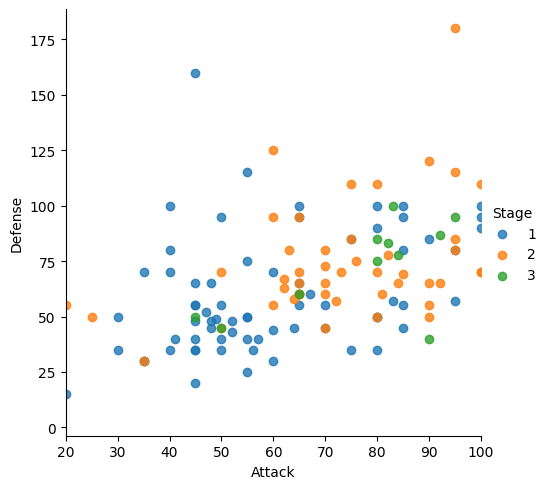

In [14]:
plt.figure(figsize=(10,6));

sns.lmplot(x='Attack', y='Defense', data = df, fit_reg=False, hue='Stage');
plt.xlim(20, 100);

In [15]:
# 9. Dibuja un diagrama de cajas con el dataframe

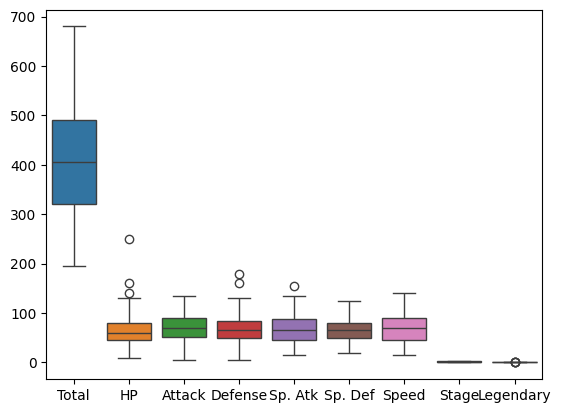

In [16]:
sns.boxplot(data=df);

In [17]:
# 10. No nos interesan las columnas Total, Stage ni Legendary
# Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

In [18]:
df_reduced = df[[col for col in df.columns if col not in ['Total', 'Stage', 'Legendary']]]
df_reduced.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


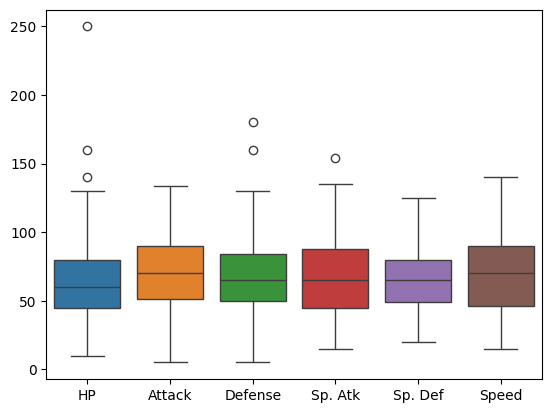

In [19]:
sns.boxplot(data=df_reduced);

In [20]:
# 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [21]:
df_reduced['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [22]:
df_reduced['Type 1'].nunique()

15

In [23]:
# 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [24]:
df_12 = df_reduced[df_reduced['Type 1'].isin(['Grass', 'Fire', 'Water'])]
df_12.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [25]:
df_12['Type 1'].nunique()

3

In [26]:
# 13. Usa un estilo 'whitegrid'

In [ ]:
sns.set_style('whitegrid')

In [28]:
# 14. Pinta diagramas de violín con el DataFrame filtrado por los 3 tipos

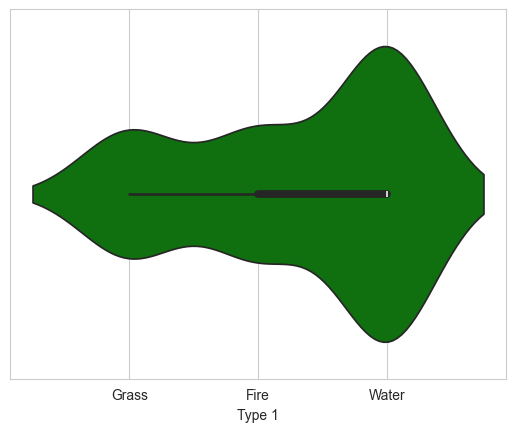

In [29]:
sns.violinplot(x='Type 1', data=df_12, color='green');

In [30]:
# 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [31]:
lst_colores = ['#78C850', '#F08030',  '#6890F0']

In [32]:
# 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

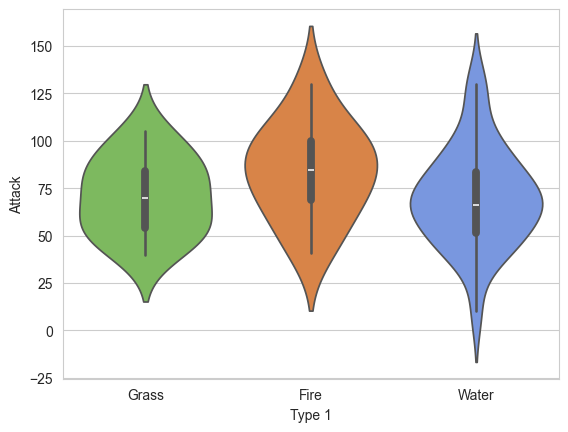

In [33]:
sns.violinplot(x='Type 1',  y='Attack',data=df_12, palette=lst_colores);

In [34]:
# 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si 
# Grass tiene muchos puntos y Fire tiene muy pocos.
# Para ver esto, usamos el swarmplot.
# Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

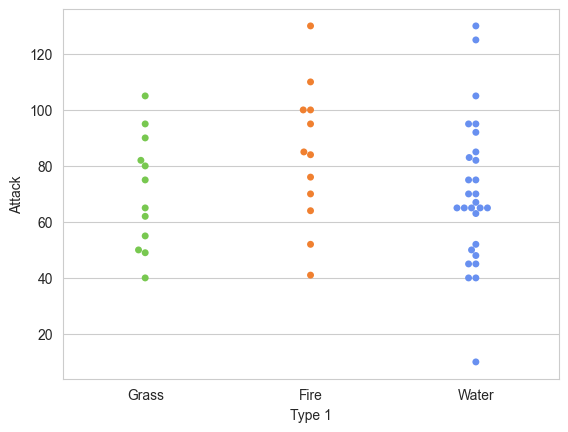

In [35]:
sns.swarmplot(x='Type 1', y='Attack', data=df_12, palette=lst_colores);

In [36]:
# 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
# Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9 en el swarmplot
# Pon un título con pyplot (como siempre)

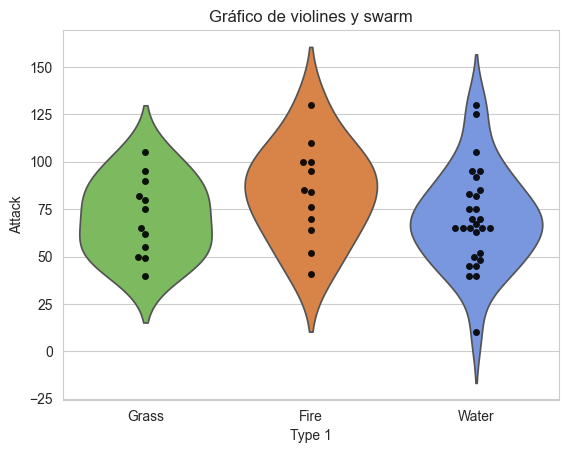

In [ ]:
sns.violinplot(x='Type 1', y='Attack',data=df_12, inner=None, palette=lst_colores);
sns.swarmplot(x='Type 1', y='Attack', data=df_12, color='k', alpha=0.9);
plt.title('Gráfico de Violines y Swarm');

In [38]:
# 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
# Dado un DataFrame, melt recibe varios parámetros:
# * qué columnas del DataFrame se quedan igual
# * qué nombres de columnas del dataframe pasan a ser una columna nueva
# * cómo queremos llamar esas nuevas columnas

# Primero recuerda el Dataframe df_grass_fire_water con las primeras 5 filas

In [39]:
df_12.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [40]:
df_12['Type 1'].nunique()

3

In [ ]:
# 20. Queremos dejar igual las variables 'Name' y 'Type 1'
# Queremos añadir una columa nueva cuyos valores sean las columnas 
# que queremos apilar y que se llame 'New Column'
# Escribimos df_gfw.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')

In [42]:
df_melt = df_12.melt(id_vars=['Name', 'Type 1', 'Type 2'], var_name='New Column')
df_melt.head()

,Name,Type 1,Type 2,New Column,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [43]:
df_melt['Type 1'].nunique()

3

In [44]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

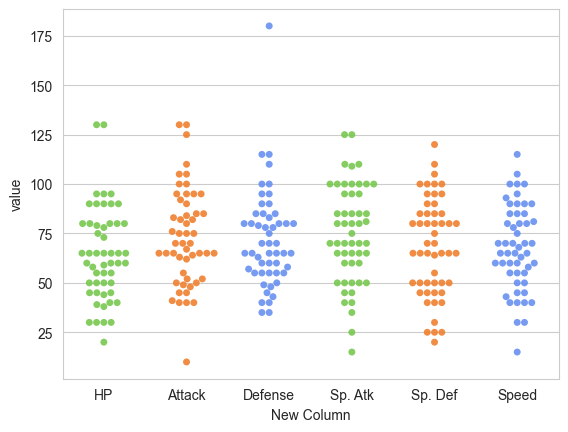

In [45]:
sns.swarmplot(x='New Column', y='value', data=df_melt, alpha=0.9, palette=lst_colores);

In [ ]:
# 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) 
# (usa plt). En el swarmplot añade el argumento dodge a True y usa la anterior 
# paleta de colores Pokemon

# Dodge en inglés es "esquivar", ¿qué diferencia ves?

# Usando plt 
# fija el límite del eje Y entre 0 y 200
# fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


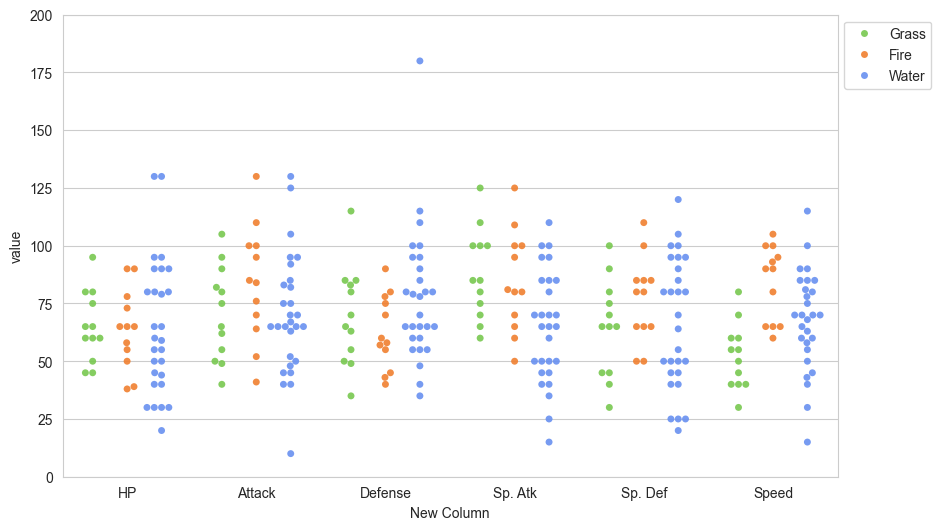

In [47]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='New Column', y='value',
              data=df_melt, alpha=0.9, 
              palette=lst_colores, 
              dodge=True,
              hue='Type 1');
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1, 1), loc=2);


In [48]:
# Observa que incluso usando Seaborn, usamos Pyplot para trabajar con los ejes, la leyenda y el tamaño
# Lo importante es que Seaborn y Pyplot conviven bien juntos

In [49]:
# 23. Mapas de calor
# Calcula las correlaciones del primer DataFrame original df
# Pista: las correlaciones se calculan con el método corr()
# Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [50]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [51]:
df_no = df.select_dtypes(include='number')
df_no.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
#,,,,,,,,
1,318,45,49,49,65,65,45,1
2,405,60,62,63,80,80,60,2
3,525,80,82,83,100,100,80,3
4,309,39,52,43,60,50,65,1
5,405,58,64,58,80,65,80,2


<Axes: >

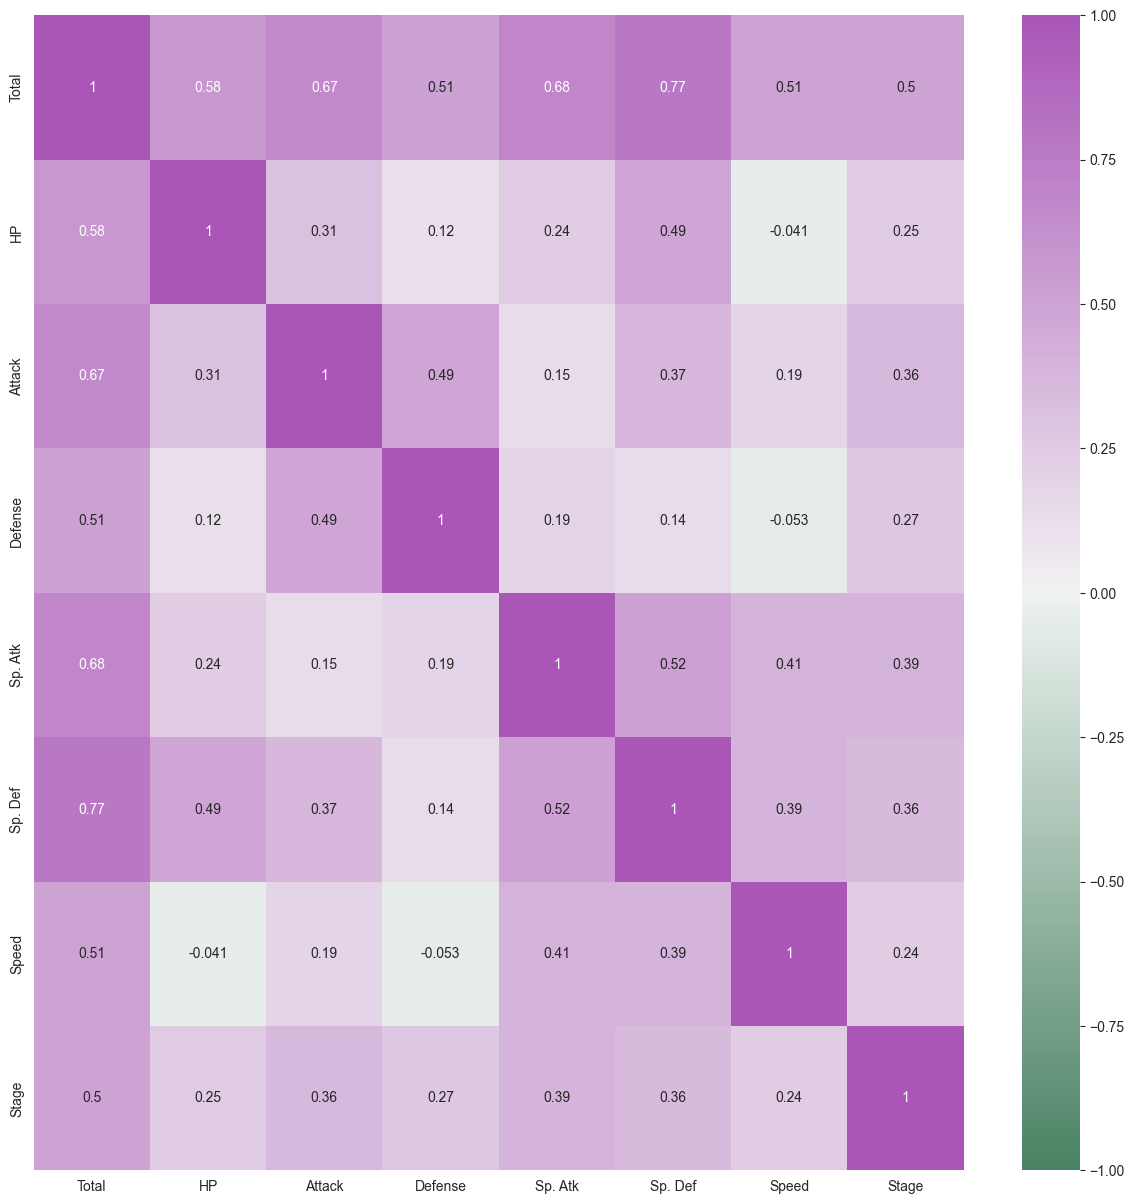

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df_no.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
            annot=True)

In [53]:
# ¿la correlación entre qué valores se encuentra? [-1:1]
# la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
# Encuentra dos variables que veas que están fuertemente relacionadas según la correlación
# Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías? (ML)

1. ¿la correlación entre qué valores se encuentra? [-1:1]
2.  la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias? Está representada por la diagonal (morado oscuro)
3. dos variables fuertemente relacionadas:
    sp_defense & Total 0.77
    sp_atk & Total 0.68

In [54]:
df_no.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

Total    Total      1.000000
         Sp. Def    0.774383
Sp. Atk  Total      0.680745
Total    Attack     0.670939
HP       Total      0.576591
Sp. Def  Sp. Atk    0.522907
Defense  Total      0.508694
Total    Speed      0.506950
Stage    Total      0.504224
Defense  Attack     0.491965
HP       Sp. Def    0.490978
Speed    Sp. Atk    0.411516
Sp. Def  Speed      0.392656
Stage    Sp. Atk    0.391712
Attack   Sp. Def    0.369069
Stage    Attack     0.361321
Sp. Def  Stage      0.358308
Attack   HP         0.306768
Defense  Stage      0.270861
Stage    HP         0.249207
         Speed      0.240042
HP       Sp. Atk    0.236649
Speed    Attack     0.194701
Defense  Sp. Atk    0.187569
Sp. Atk  Attack     0.146312
Defense  Sp. Def    0.139912
HP       Defense    0.119782
Speed    Defense    0.053252
HP       Speed      0.040939
dtype: float64

In [55]:
corr_matrix = df_no.corr()
corr_pairs = corr_matrix.unstack()

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

strong_corrs = corr_pairs[(corr_pairs > 0.6) | (corr_pairs < -0.6)]

strong_corrs = strong_corrs.drop_duplicates().sort_values(ascending=False)
print(strong_corrs)


Total  Sp. Def    0.774383
       Sp. Atk    0.680745
       Attack     0.670939
dtype: float64


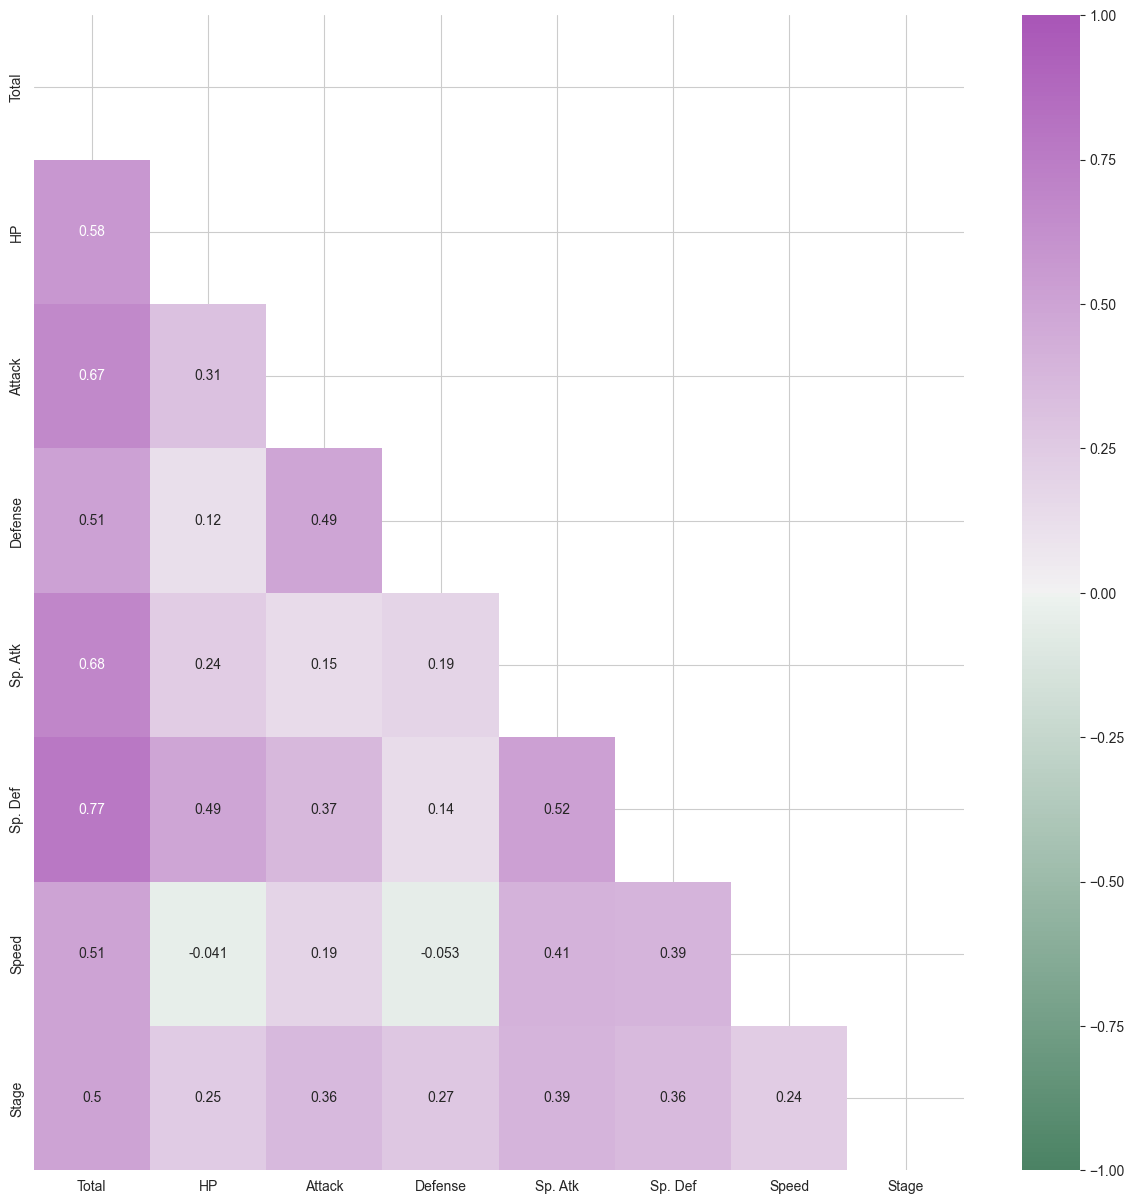

In [56]:
mask = np.triu(np.ones_like(df_no.corr(), dtype=bool))
# sns.heatmap(df_no.corr(), mask=mask, ...)

plt.figure(figsize=(15,15))
sns.heatmap(df_no.corr(),
            mask=mask,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
            annot=True);


In [57]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [58]:
# 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

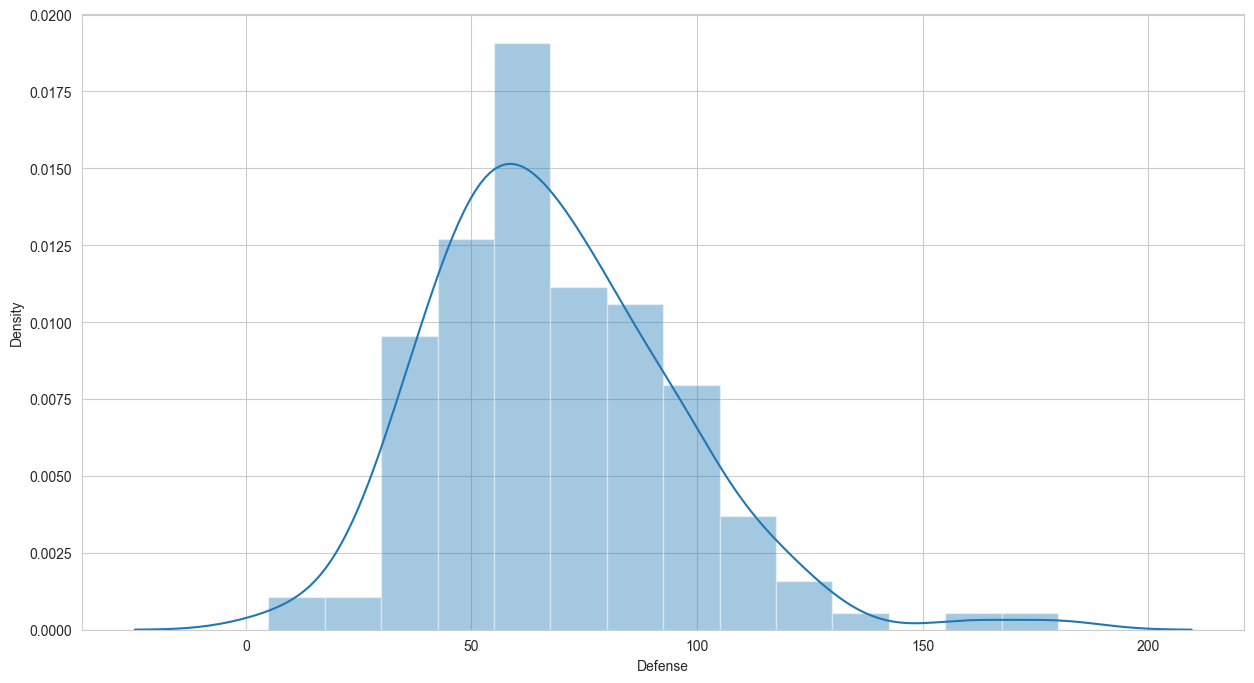

In [59]:
plt.figure(figsize=(15,8));

sns.distplot(df.Defense);

In [60]:
# 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
# Usa un sns.countplot
# Usa plt.xticks y gira las etiquetas

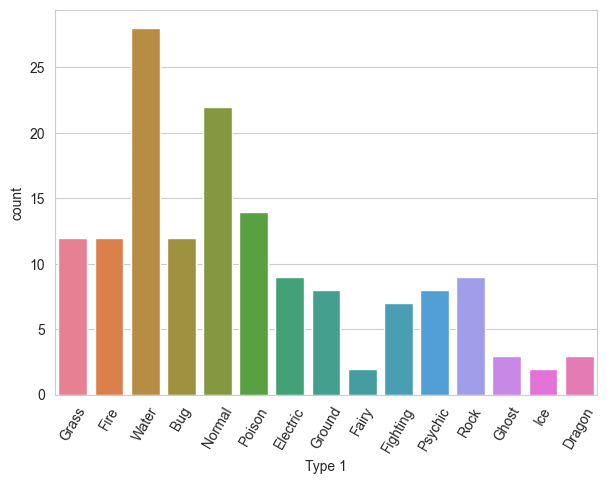

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['Type 1'], hue=df['Type 1']);
plt.xticks(rotation=60);

In [62]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [70]:
df.Legendary.unique()

array([False,  True])

In [63]:
# 26. Usa catplot con el DataFrame original.
# Muestra el valor de Defense según el 'Type 1', 
# muestra un subplot para legendarios y otro para no legendarios
# y divide los colores según el Type 2

<Figure size 3000x1000 with 0 Axes>

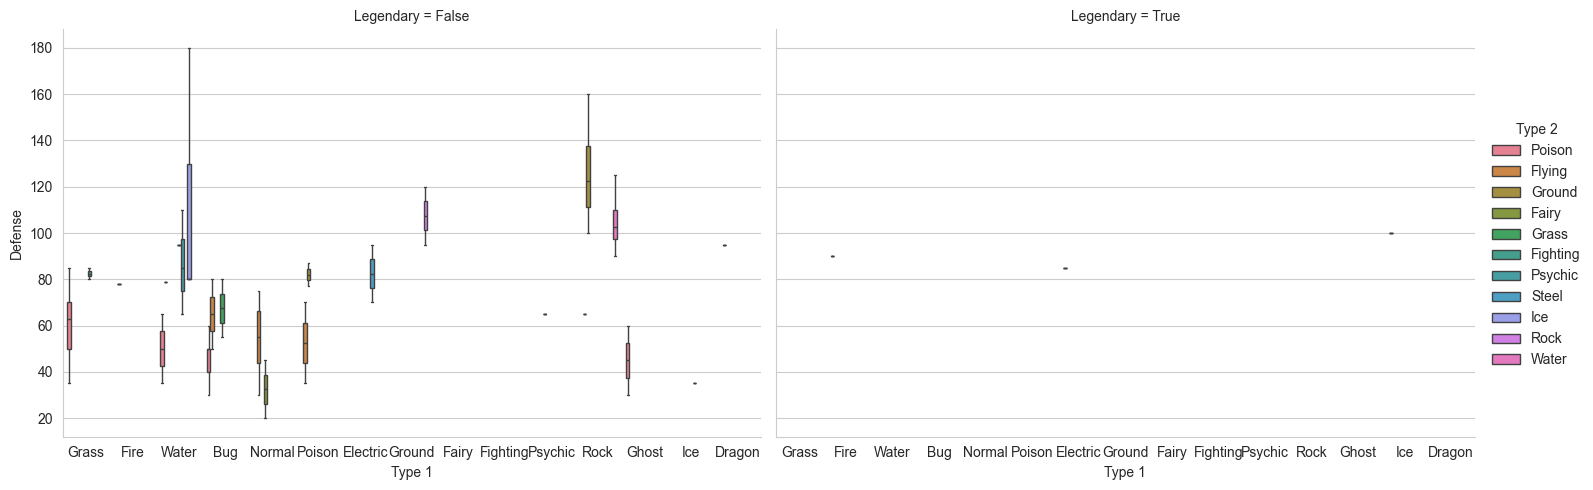

In [68]:
plt.figure(figsize=(30,10));
sns.catplot(data=df,
            x="Type 1",
            y="Defense",
            hue="Type 2",
            col="Legendary",
            kind="box",
            height=5,
            aspect=1.5);

In [ ]:
# 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel)
#  de la defensa respecto al ataque.
# Di un bin 2D donde caigan muchos puntos (ataque, defensa).

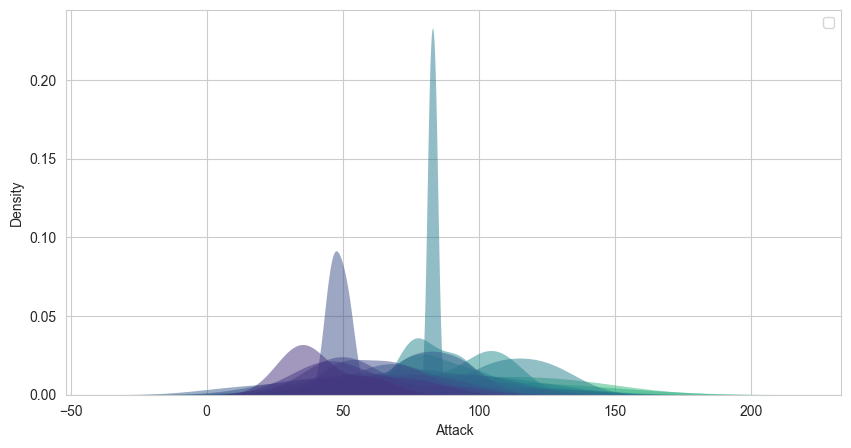

In [83]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=df, 
   x="Attack", 
   hue="Defense",
   fill=True, 
   common_norm=False, 
   alpha=.5, 
   linewidth=0,
   thresh=0.05,
   levels=10,
   palette='viridis'
);
plt.legend('');

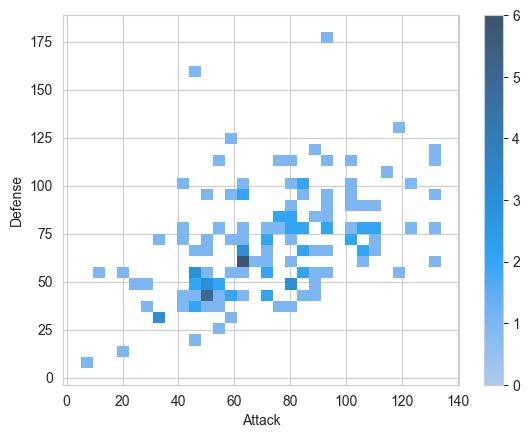

In [77]:
sns.histplot(
    data=df,
    x="Attack",
    y="Defense",
    bins=30,
    cbar=True
);

In [ ]:
# 28. Pinta una distribución de probabilidad conjunta con jointplot, 
# pintando la defensa respecto al ataque del DataFrame original

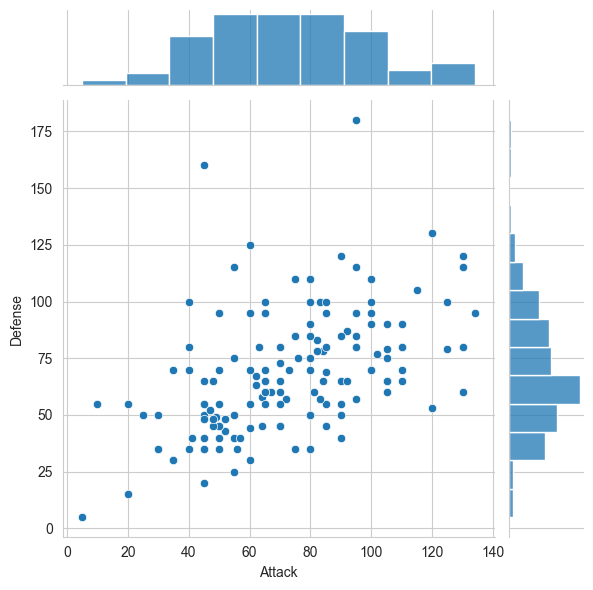

In [ ]:
sns.jointplot(data=df,
              x='Attack',
              y='Defense',
             );